## Instalamos las librerías: Ultralytics, Scikit-learn y Seaborn
- Ultralytics: Necesario para trabajar con YOLOv9e, ya que contiene el framework de entrenamiento y validación del modelo.

- Scikit-learn: Útil para métricas y análisis de datos, como evaluar la precisión del modelo con técnicas como classification_report.

- Seaborn: Se usa para visualizar datos, especialmente en la exploración de la distribución de clases y análisis de errores.

In [ ]:
!pip install ultralytics scikit-learn seaborn --quiet 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.1 MB/s eta 0:00:00:00:0100:01


## Librerias

In [2]:
import os
import torch
import pandas as pd
from ultralytics import YOLO
import matplotlib.pyplot as plt
import random
import cv2

## Creamos el archivo data.yaml

In [26]:
yaml_content = """
path: ../Dataset
train: train/images
val: val/images
test: test/images

nc: 1
names: ['human']
"""

In [27]:
with open("data.yaml", "w") as f:
    f.write(yaml_content)

## Creacion del Modelo

In [28]:
from ultralytics import YOLO

In [29]:
model = YOLO('yolov9e.pt')

100%|██████████| 112M/112M [00:23<00:00, 5.04MB/s] 


## Entrenamiento del Modelo

In [ ]:
dvc = 'cuda' if torch.cuda.is_available() else 'cpu'
results = model.train(
    data='./data.yaml',
    epochs=50, 
    imgsz=640,
    batch=16,  #numero de imagenes procesadas a la vez
    lr0=0.005, #tasa de aprendizaje, Balance ideal entre velocidad de aprendizaje y estabilidad.
    optimizer='Adam', #optimizador, Adam trabaja mejor con imagenes de multitudes
    weight_decay=0.001, #Evita overfitting, Suficiente para reducir sobreajuste. No interfiere tanto en el aprendizaje 
    warmup_epochs=3, #para prevenir saltos inestables con el lr al inicio del entrenamiento
    dropout=0.1, #desactiva un 10% de neuronas para evitar sobreajustes
    mosaic=1.0, #para mejorar la robustez del modelo
    hsv_h=0.015, #Ayuda a generalizar en distintos tipos de luz y color
    degrees=10.0, #mejora la capacidad del modelo para detectar objetos en diferentes orientaciones
    device= dvc,
    name='train_exp2',
    exist_ok=True
)

Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/c2a.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9e.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train1_all, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1         0  torch.nn.modules.linear.Identity             []                            
  1                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  2                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  3                  -1  1    252160  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 2]        
  4                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  5                  -1  1   1004032  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 2]       
  6                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  7                  -1  1   4006912  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.3±0.2 ms, read: 36.3±15.5 MB/s, size: 322.4 KB)


train: Scanning /kaggle/input/c2a-dataset/C2A_Dataset/new_dataset3/train/labels... 6129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6129/6129 [00:39<00:00, 153.76it/s]


train: /kaggle/input/c2a-dataset/C2A_Dataset/new_dataset3/train/images/flood_image0407_3.png: 1 duplicate labels removed
WARNING ⚠️ train: Cache directory /kaggle/input/c2a-dataset/C2A_Dataset/new_dataset3/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/c2a-dataset/C2A_Dataset/new_dataset3/val/labels... 10 images, 0 backgrounds, 0 corrupt:   0%|          | 10/2043 [00:00<00:32, 63.15it/s]5.81it/s] 

val: Fast image access ✅ (ping: 0.2±0.2 ms, read: 40.6±20.9 MB/s, size: 262.5 KB)


train: Scanning /kaggle/input/c2a-dataset/C2A_Dataset/new_dataset3/train/labels... 6129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6129/6129 [00:06<00:00, 922.19it/s]
val: Scanning /kaggle/input/c2a-dataset/C2A_Dataset/new_dataset3/val/labels... 2043 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2043/2043 [00:12<00:00, 162.05it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/c2a-dataset/C2A_Dataset/new_dataset3/val is not writeable, cache not saved.
Plotting labels to /kaggle/working/train1_all/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/train1_all
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.82G      1.269     0.8904      1.032         12        640: 100%|██████████| 767/767 [07:21<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:22<00:00,  3.09it/s]


                   all       2043      72123      0.757      0.642      0.677      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.62G      1.281     0.8356      1.032         18        640: 100%|██████████| 767/767 [06:57<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:22<00:00,  3.10it/s]


                   all       2043      72123      0.474      0.611       0.37      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.61G      1.255     0.8201      1.023         14        640: 100%|██████████| 767/767 [06:50<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.13it/s]


                   all       2043      72123      0.776      0.645      0.696      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.63G      1.199     0.7751      1.006         47        640: 100%|██████████| 767/767 [06:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.12it/s]


                   all       2043      72123      0.806      0.682      0.736      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.27G      1.166     0.7554      1.001         17        640: 100%|██████████| 767/767 [06:46<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.13it/s]


                   all       2043      72123      0.811      0.688       0.75      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.56G      1.137      0.733     0.9971         38        640: 100%|██████████| 767/767 [06:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.13it/s]


                   all       2043      72123      0.828       0.69      0.756      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.69G      1.116     0.7177      0.986         23        640: 100%|██████████| 767/767 [06:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.822      0.703      0.764      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.66G       1.09     0.6993     0.9777         48        640: 100%|██████████| 767/767 [06:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.13it/s]


                   all       2043      72123      0.816      0.702      0.763      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.57G      1.082     0.6974     0.9844         29        640: 100%|██████████| 767/767 [06:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.13it/s]


                   all       2043      72123      0.828      0.701      0.768      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.57G      1.067     0.6803     0.9809         70        640: 100%|██████████| 767/767 [06:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:22<00:00,  3.12it/s]


                   all       2043      72123      0.844      0.677      0.747      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.57G       1.06     0.6788     0.9732         44        640: 100%|██████████| 767/767 [06:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.826      0.713      0.777      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.63G      1.054     0.6753     0.9702         54        640: 100%|██████████| 767/767 [06:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.839      0.704      0.776      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.59G      1.041      0.668     0.9679         45        640: 100%|██████████| 767/767 [06:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.827       0.71      0.776      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.51G      1.031     0.6613     0.9702         77        640: 100%|██████████| 767/767 [06:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.832      0.713      0.779      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.66G      1.027     0.6556     0.9648         45        640: 100%|██████████| 767/767 [06:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.835      0.718      0.786      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.68G      1.022     0.6535     0.9624         21        640: 100%|██████████| 767/767 [06:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.841      0.714      0.787      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.58G     0.9958     0.6425     0.9578         60        640: 100%|██████████| 767/767 [06:47<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.828      0.723      0.785      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.59G     0.9908     0.6363     0.9568        101        640: 100%|██████████| 767/767 [06:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.846      0.724      0.796       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.32G     0.9912     0.6324     0.9541         16        640: 100%|██████████| 767/767 [06:46<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.849       0.73      0.796      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.63G     0.9867       0.63     0.9548         49        640: 100%|██████████| 767/767 [06:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.849      0.726      0.798      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.58G     0.9794     0.6223     0.9505         91        640: 100%|██████████| 767/767 [06:44<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.846      0.734      0.799      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.56G     0.9684     0.6171     0.9512         32        640: 100%|██████████| 767/767 [06:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.845      0.733        0.8      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       6.7G     0.9612     0.6142     0.9474         37        640: 100%|██████████| 767/767 [06:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.847      0.729      0.801      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.69G     0.9593     0.6139     0.9486         21        640: 100%|██████████| 767/767 [06:46<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.843      0.733        0.8      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.57G     0.9639     0.6126      0.947         54        640: 100%|██████████| 767/767 [06:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.846      0.732      0.802      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.59G     0.9554     0.6059     0.9455         28        640: 100%|██████████| 767/767 [06:44<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.851      0.739      0.808      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.57G     0.9442      0.603     0.9477         13        640: 100%|██████████| 767/767 [06:44<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.854      0.731      0.805      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.29G     0.9389     0.5906      0.942         13        640: 100%|██████████| 767/767 [06:44<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.858      0.736      0.808       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.71G     0.9299     0.5872     0.9388         18        640: 100%|██████████| 767/767 [06:43<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.858      0.737      0.808      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.24G     0.9187     0.5867     0.9416         27        640: 100%|██████████| 767/767 [06:44<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.859      0.738      0.809      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.67G     0.9233     0.5867     0.9361        143        640: 100%|██████████| 767/767 [06:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.858      0.742      0.812      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.67G      0.914     0.5778     0.9337         68        640: 100%|██████████| 767/767 [06:44<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.857      0.747      0.813      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.58G     0.9217     0.5833     0.9375         64        640: 100%|██████████| 767/767 [06:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.858      0.742      0.814      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.58G     0.9168     0.5762     0.9352         64        640: 100%|██████████| 767/767 [06:44<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.867      0.741      0.815      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.24G     0.9083     0.5692     0.9334         20        640: 100%|██████████| 767/767 [06:44<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123      0.856      0.737      0.812      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.58G     0.8954     0.5675     0.9307         47        640: 100%|██████████| 767/767 [06:44<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.866      0.744      0.818      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.85G     0.8951     0.5622     0.9288         69        640: 100%|██████████| 767/767 [06:44<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.16it/s]


                   all       2043      72123      0.863      0.749      0.819       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.56G     0.8897     0.5591     0.9251         57        640: 100%|██████████| 767/767 [06:44<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.865      0.746      0.819       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.91G     0.8815      0.555     0.9222         33        640: 100%|██████████| 767/767 [06:44<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.861      0.747      0.819       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.67G     0.8835     0.5541     0.9266         27        640: 100%|██████████| 767/767 [06:44<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.16it/s]


                   all       2043      72123      0.865      0.748      0.821      0.594
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.56G     0.8552     0.5425     0.9333         43        640: 100%|██████████| 767/767 [06:42<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.868      0.745      0.818      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.58G     0.8462     0.5385     0.9313         43        640: 100%|██████████| 767/767 [06:42<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123       0.87      0.742       0.82      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.57G     0.8376     0.5308     0.9255         37        640: 100%|██████████| 767/767 [06:42<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.875      0.742       0.82      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.58G     0.8324     0.5252     0.9231         28        640: 100%|██████████| 767/767 [06:42<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.14it/s]


                   all       2043      72123       0.87      0.746      0.821      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.59G     0.8328     0.5273     0.9245         49        640: 100%|██████████| 767/767 [06:42<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.869      0.748      0.822      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.59G     0.8284     0.5214     0.9249         42        640: 100%|██████████| 767/767 [06:41<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.874      0.747      0.823      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.62G     0.8277      0.521     0.9254         34        640: 100%|██████████| 767/767 [06:43<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123       0.87       0.75      0.823        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.83G     0.8179     0.5083     0.9171         26        640: 100%|██████████| 767/767 [06:43<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:21<00:00,  3.15it/s]


                   all       2043      72123      0.872       0.75      0.824        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.42G     0.8073     0.5077     0.9182        132        640:  94%|█████████▍| 721/767 [06:18<00:25,  1.82it/s]

## Extraccion de Metricas

In [ ]:
import pandas as pd

metrics = {
    'Precision': results.box.mp,        # mean precision
    'Recall': results.box.mr,           # mean recall
    'F1 Score': 2 * (results.box.mp * results.box.mr) / (results.box.mp + results.box.mr + 1e-6),
    'Avg IoU': results.box.iou.item if hasattr(results.box, 'iou') else None,
    'mAP@0.5': results.box.map50,
    'mAP@0.5:0.95': results.box.map
}

df_metrics = pd.DataFrame([metrics])
print("📊 Métricas del Training:")
display(df_metrics)

📊 Métricas del Testing:


Precision   Recall  F1 Score Avg IoU   mAP@0.5  mAP@0.5:0.95
0   0.877231  0.75667  0.812502    None  0.830748       0.62053

## Validacion

In [6]:
# Cargar modelo ya entrenado
model = YOLO("../code/runs/detect/train_exp2/weights/best.pt")

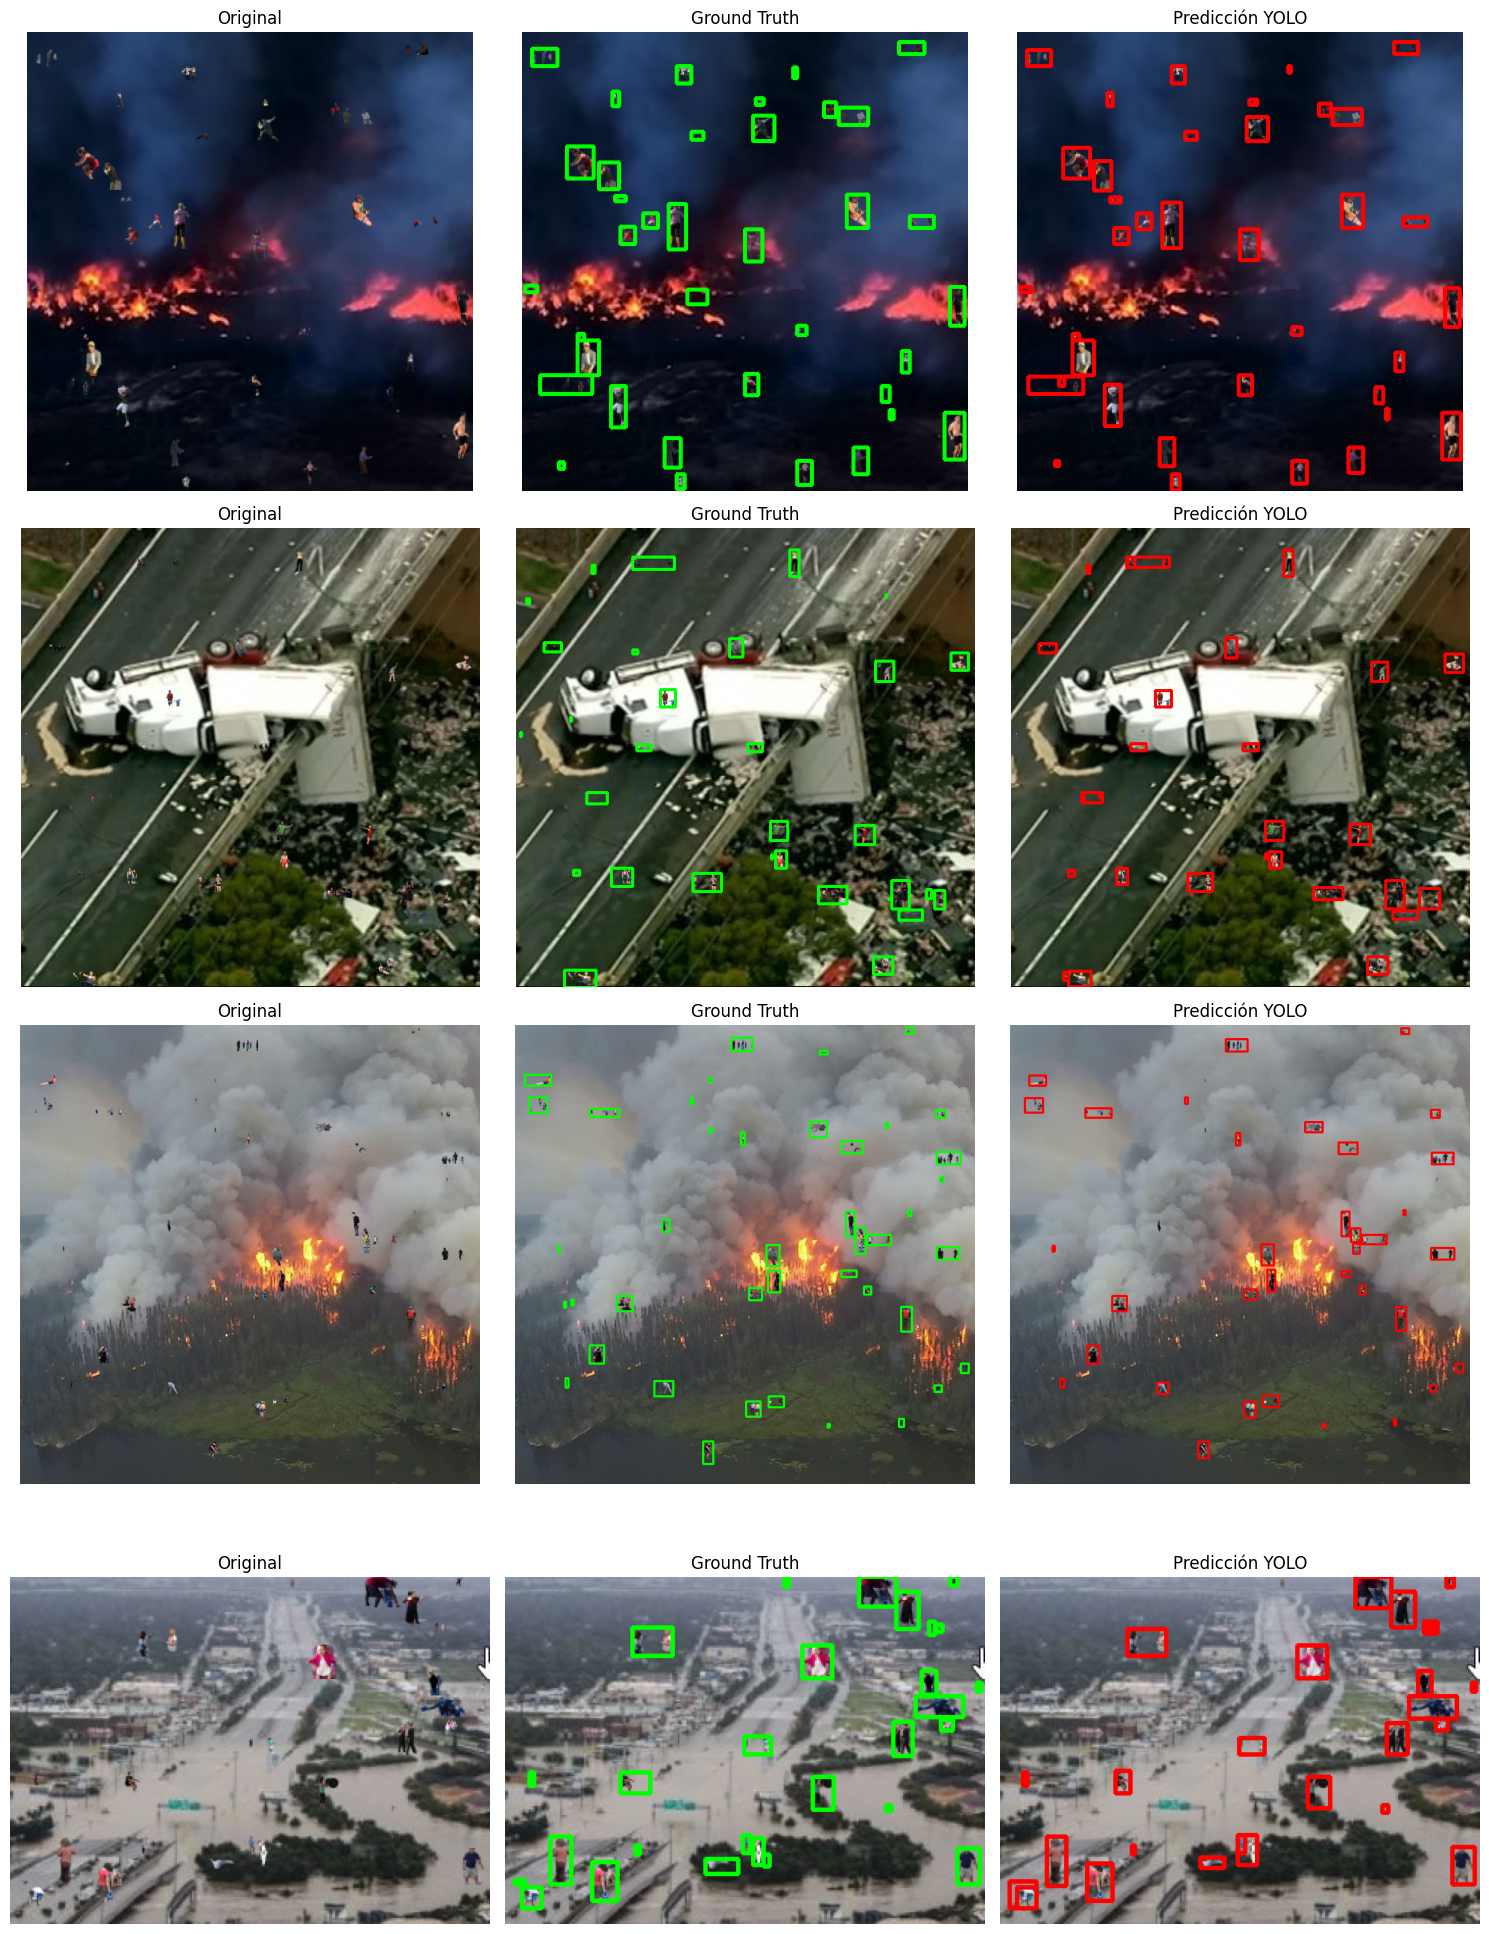

In [8]:
# Ruta del dataset de test
base_path = "../data/Dataset/test"
images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")

# Función para convertir cajas YOLO a formato pixel
def yolo_to_bbox(box, w, h):
    x, y, bw, bh = box
    x1 = int((x - bw / 2) * w)
    y1 = int((y - bh / 2) * h)
    x2 = int((x + bw / 2) * w)
    y2 = int((y + bh / 2) * h)
    return x1, y1, x2, y2

# Cargar anotaciones reales
def load_gt_labels(label_file):
    boxes = []
    with open(label_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                _, x, y, w, h = map(float, parts[:5])
                boxes.append((x, y, w, h))
    return boxes

# Elegir imágenes al azar
def get_sample_images(img_dir, sample_size=4, ext=".png"):
    files = [f for f in os.listdir(img_dir) if f.endswith(ext)]
    if len(files) == 0:
        raise ValueError(f"No se encontraron imágenes en: {img_dir}")
    return random.sample(files, min(sample_size, len(files)))
    
sample_images = get_sample_images(images_path)

# Mostrar subplots
fig, axes = plt.subplots(len(sample_images), 3, figsize=(15, 5 * len(sample_images)))

for idx, image_name in enumerate(sample_images):
    img_path = os.path.join(images_path, image_name)
    label_path = os.path.join(labels_path, image_name.replace(".png", ".txt"))

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Imagen original
    axes[idx][0].imshow(img_rgb)
    axes[idx][0].set_title("Original")
    axes[idx][0].axis("off")

    # Ground truth
    gt_img = img_rgb.copy()
    if os.path.exists(label_path):
        boxes = load_gt_labels(label_path)
        for box in boxes:
            x1, y1, x2, y2 = yolo_to_bbox(box, w, h)
            cv2.rectangle(gt_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    axes[idx][1].imshow(gt_img)
    axes[idx][1].set_title("Ground Truth")
    axes[idx][1].axis("off")

    # Predicción
    results = model(img_path, verbose=False)[0]
    pred_img = img_rgb.copy()
    for box in results.boxes.xyxy.cpu().numpy():
        x1, y1, x2, y2 = map(int, box[:4])
        cv2.rectangle(pred_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    axes[idx][2].imshow(pred_img)
    axes[idx][2].set_title("Predicción YOLO")
    axes[idx][2].axis("off")

plt.tight_layout()
plt.show()

## Precision vs Epocas

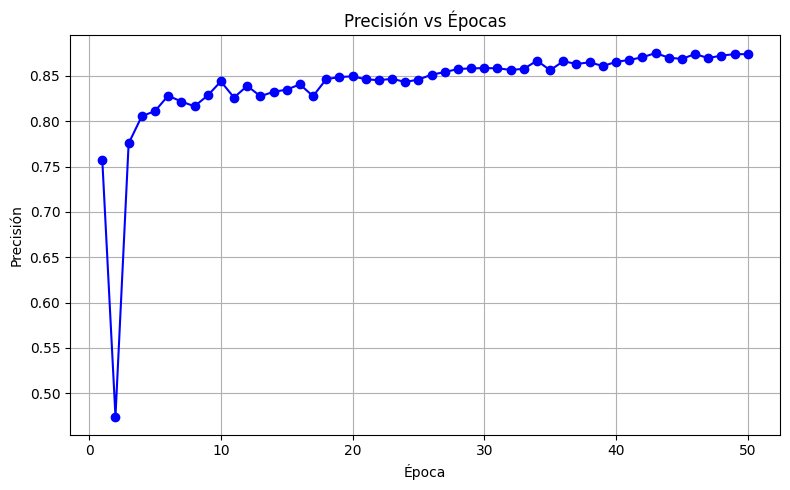

In [9]:
import matplotlib.pyplot as plt

df_results = pd.read_csv("../code/runs/detect/train_exp2/results.csv")


plt.figure(figsize=(8,5))
plt.plot(df_results['epoch'], df_results['metrics/precision(B)'], marker='o', linestyle='-', color='blue')
plt.title("Precisión vs Épocas")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.grid(True)
plt.tight_layout()
plt.show()

## Grafica Perdida Total vs Epocas

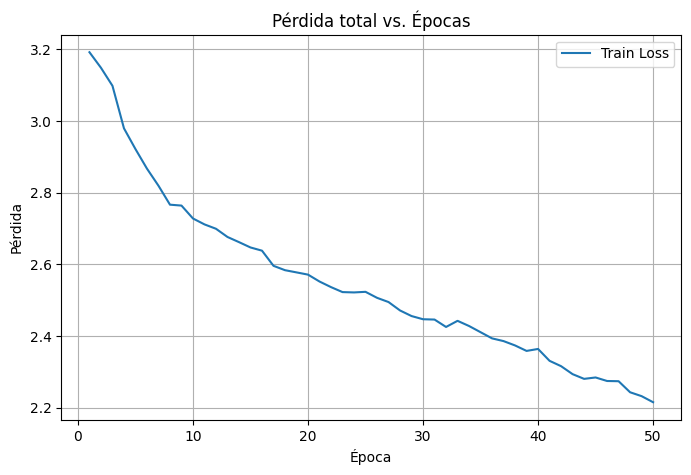

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df_results = pd.read_csv("../code/runs/detect/train_exp2/results.csv")
# df_results = pd.read_csv("../CodigoFuente/results.csv")
df_results['train/total_loss'] = df_results['train/box_loss'] + df_results['train/cls_loss'] + df_results['train/dfl_loss']


plt.figure(figsize=(8,5))
plt.plot(df_results['epoch'], df_results['train/total_loss'], label='Train Loss')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida total vs. Épocas')
plt.legend()
plt.grid(True)
plt.show()

## Predicciones

### Una imagen

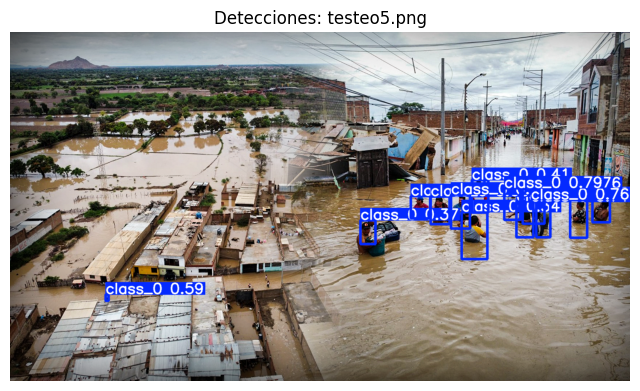

In [21]:
def predecir_y_mostrar(model, ruta_imagen, conf=0.3):
    extensiones_validas = (".jpg", ".jpeg", ".png", ".webp")

    # Verifica si la imagen existe
    if not os.path.exists(ruta_imagen):
        print(f"La imagen no existe: {ruta_imagen}")
        return

    # Verifica si es una extensión válida
    if not ruta_imagen.lower().endswith(extensiones_validas):
        print(f"Extensión no válida: {ruta_imagen}")
        return

    # Verifica que la imagen esté bien cargada


    results = model.predict(source=ruta_imagen, conf=conf)

    # Verifica si hay detecciones
    if results and results[0].boxes:
        img_result = results[0].plot()
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Detecciones: {os.path.basename(ruta_imagen)}")
        plt.show()
    else:
        print(f"No se detectaron objetos en: {os.path.basename(ruta_imagen)}")
        
ruta = "../data/Dataset/Imagenes_prueba/testeo5.png"
predecir_y_mostrar(model, ruta)


### Todas las imagenes de la carpeta

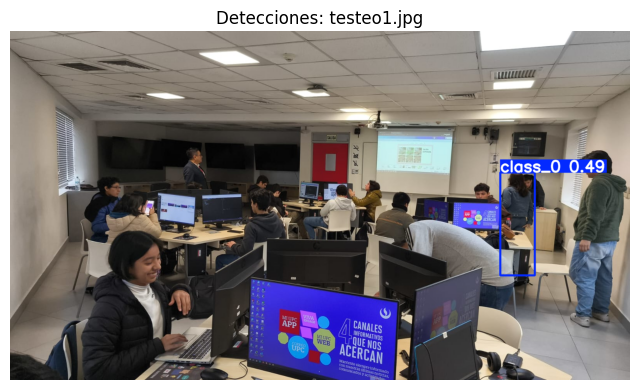

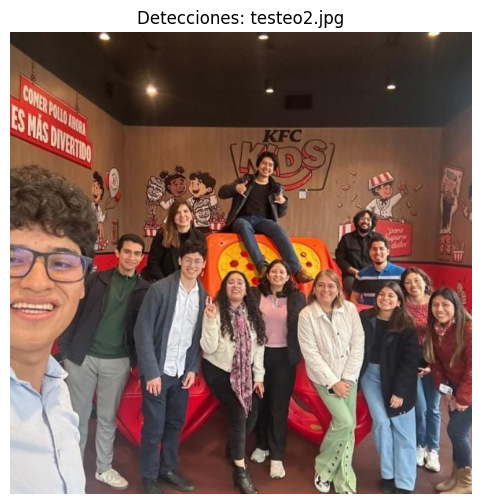

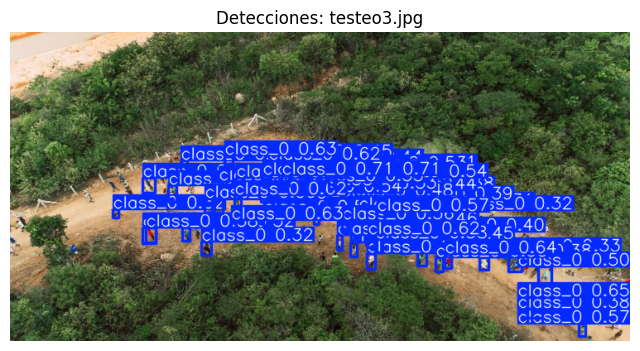

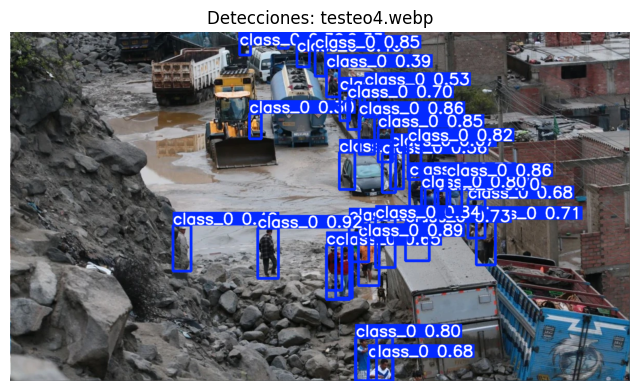

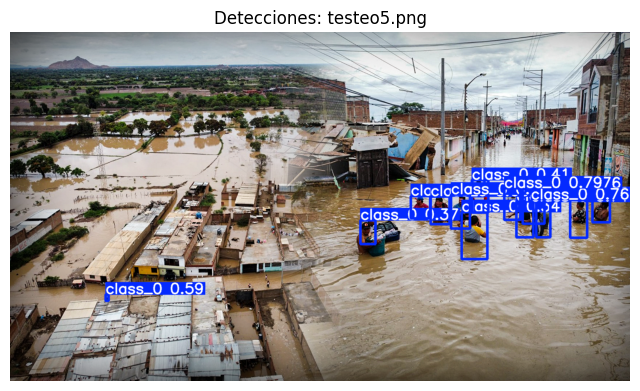

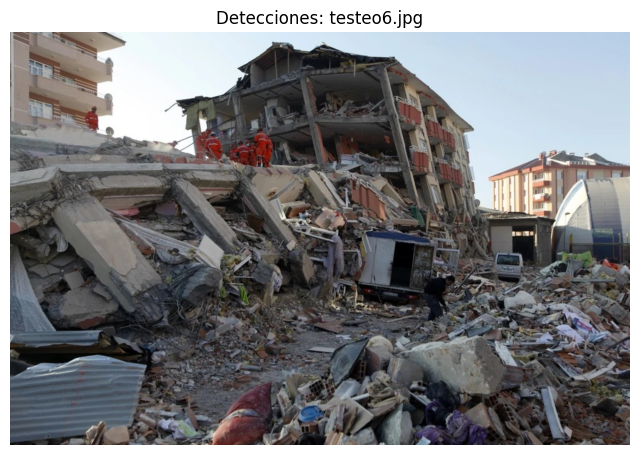

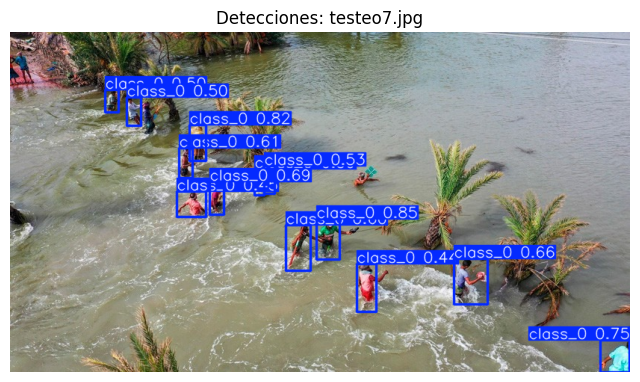

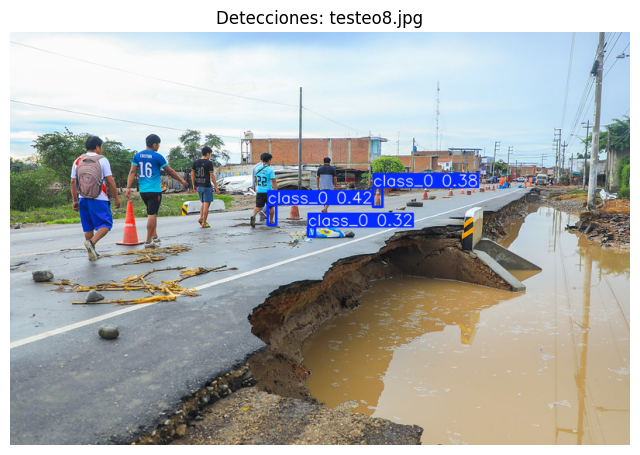

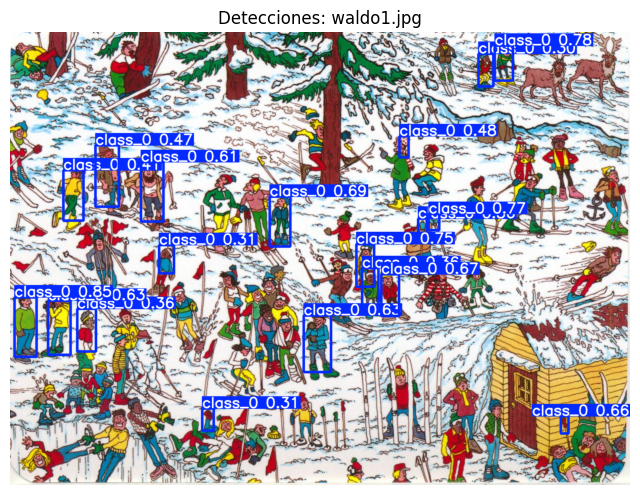

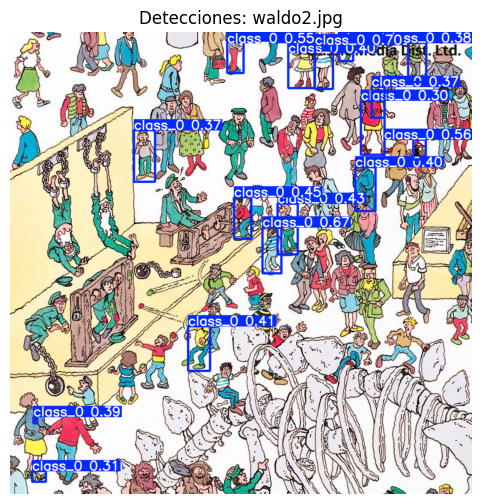

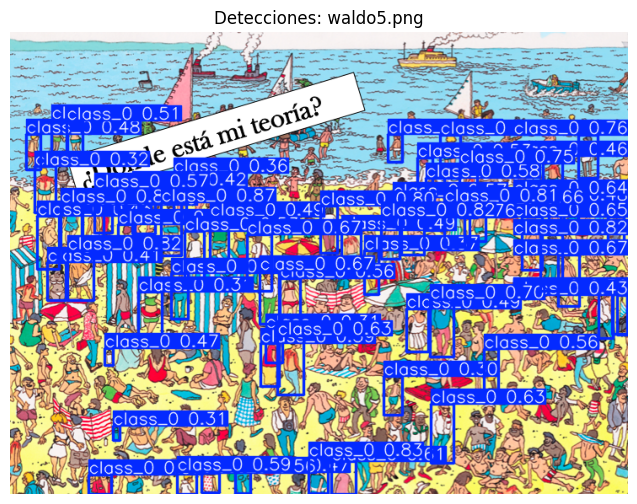

In [19]:
folder_path = "../data/Dataset/Imagenes_prueba"

extensiones_validas = (".jpg", ".jpeg", ".png", ".webp")

for nombre_imagen in os.listdir(folder_path):
    if nombre_imagen.lower().endswith(extensiones_validas):
        ruta_imagen = os.path.join(folder_path, nombre_imagen)

        results = model.predict(source=ruta_imagen, conf=0.3)

        img_result = results[0].plot()

        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Detecciones: {nombre_imagen}")
        plt.show()